In [40]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

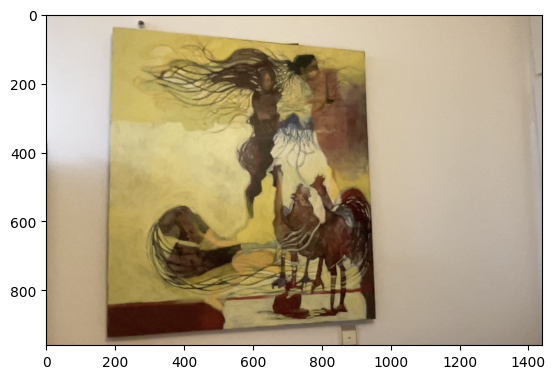

In [56]:
img1 = cv.imread('first.jpg')
img2 = cv.imread('second.jpg')
img3 = cv.imread('third.jpg')
plt.imshow(img3[:, :, ::-1])

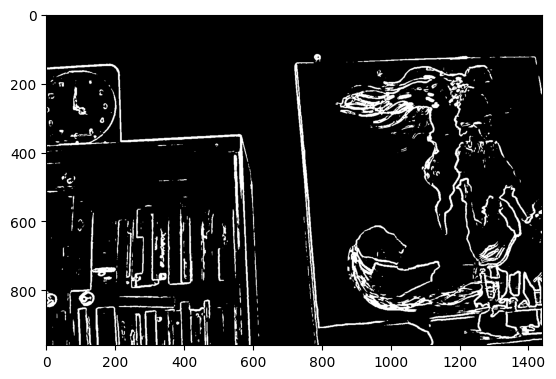

In [57]:
img = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)
g = cv.getGaussianKernel(5, 1)
g = g @ g.T
img_s = cv.filter2D(img, -1, g).astype(np.float64)

mask_x = np.array([[-1],
                   [1]])
mask_y = mask_x.T
Ix = cv.filter2D(img_s, -1, mask_x)
Iy = cv.filter2D(img_s, -1, mask_y)

Ix2 = Ix * Ix
Iy2 = Iy * Iy
IxIy = Ix * Iy

k = np.ones((3, 3))
Ix2_cov = cv.filter2D(Ix2, -1, k)
Iy2_cov = cv.filter2D(Iy2, -1, k)
IxIy_cov = cv.filter2D(IxIy, -1, k)

L1 = ((Ix2_cov + Iy2_cov) + np.sqrt(np.square(Ix2_cov + Iy2_cov) - 4 * np.square(IxIy_cov))) / 2
L2 = ((Ix2_cov + Iy2_cov) - np.sqrt(np.square(Ix2_cov + Iy2_cov) - 4 * np.square(IxIy_cov))) / 2

th = L2.mean() + 3 * L2.std()
th2 = L1.mean() + 0.5 * L1.std()
new_cornerHarris = L2 > th
new_edgeHarris = L1 > th2
plt.imshow(new_edgeHarris, cmap='gray')
plt.show()

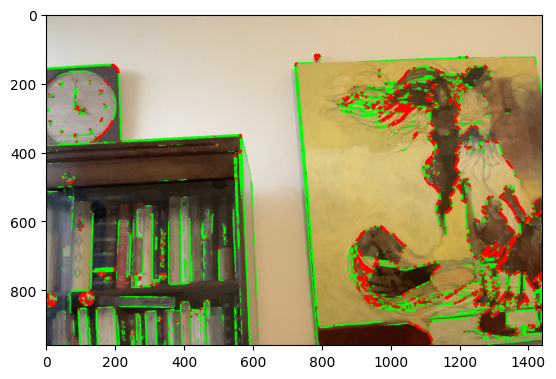

In [58]:
imgg = img2.copy()
idx = np.argwhere(new_cornerHarris)
r, c = idx[:, 0], idx[:, 1]

idx2 = np.argwhere(new_edgeHarris)
r2, c2 = idx2[:, 0], idx2[:, 1]
for i in range(len(r2)):
    imgg = cv.circle(imgg, (c2[i], r2[i]), 0, (0, 255, 0), -1)
for i in range(len(r)):
    imgg = cv.circle(imgg, (c[i], r[i]), 2, (0, 0, 255), -1)
plt.imshow(np.array(imgg[:, :, ::-1], dtype=np.uint16))
plt.show()

# SIFT: scale invariant feature transform

In [62]:
img1 = cv.imread('first.jpg')
img2 = cv.imread('second.jpg')
img3 = cv.imread('third.jpg')
img1_gray = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)
img3_gray = cv.cvtColor(img3, cv.COLOR_RGB2GRAY)
# g = cv.getGaussianKernel(5, 1)
# g = g @ g.T
# img_s = cv.filter2D(img, -1, g).astype(np.float64)
sift = cv.SIFT_create()
kp1 = sift.detect(img1_gray, None)
kp2 = sift.detect(img2_gray, None)
kp3 = sift.detect(img3_gray, None)
new1 = cv.drawKeypoints(img1_gray, kp, img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
new2 = cv.drawKeypoints(img2_gray, kp, img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
new3 = cv.drawKeypoints(img3_gray, kp, img3, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

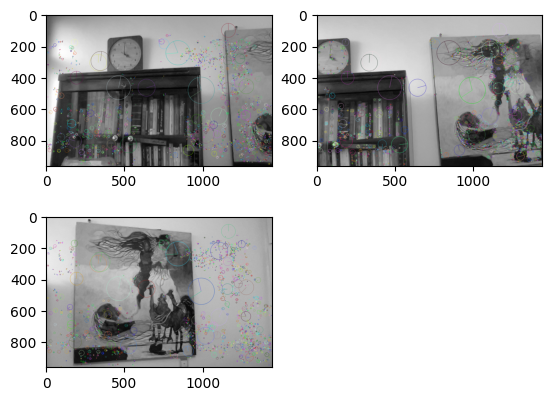

In [69]:
plt.subplot(221)
plt.imshow(new1[:, :, ::-1])
plt.subplot(222)
plt.imshow(new2[:, :, ::-1])
plt.subplot(223)
plt.imshow(new3[:, :, ::-1])
plt.show() 

trust point patches may have big SSD with little difference of camera angle or light.... so we use HOG

# HOG: histogram of gradient
patch --> Gradient magnitude --> gradient direction (remember the bins)

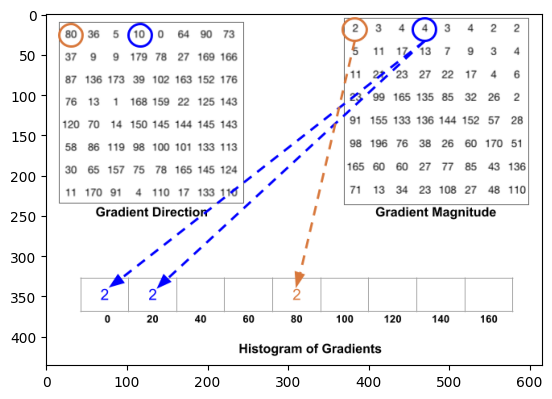

In [70]:
hog = cv.imread('hog-histogram.webp')
plt.imshow(hog)
plt.show()

In [71]:
img1 = cv.imread('first.jpg')
img2 = cv.imread('second.jpg')
img3 = cv.imread('third.jpg')
img1_gray = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)
img3_gray = cv.cvtColor(img3, cv.COLOR_RGB2GRAY)
# g = cv.getGaussianKernel(5, 1)
# g = g @ g.T
# img_s = cv.filter2D(img, -1, g).astype(np.float64)
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None) # use color image
kp2, des2 = sift.detectAndCompute(img2, None)
kp3, des3 = sift.detectAndCompute(img3, None)
new1 = cv.drawKeypoints(img1_gray, kp, img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
new2 = cv.drawKeypoints(img2_gray, kp, img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
new3 = cv.drawKeypoints(img3_gray, kp, img3, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [73]:
# we have to match the key point in first dimention
des1.shape, des2.shape, des3.shape

((854, 128), (1672, 128), (1759, 128))

In [75]:
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

In [77]:
matches = sorted(matches, key=lambda x: x.distance)

In [78]:
img4 = cv.drawMatches(img1, kp1, img2, kp2, matches[:20], img2, flags=2)

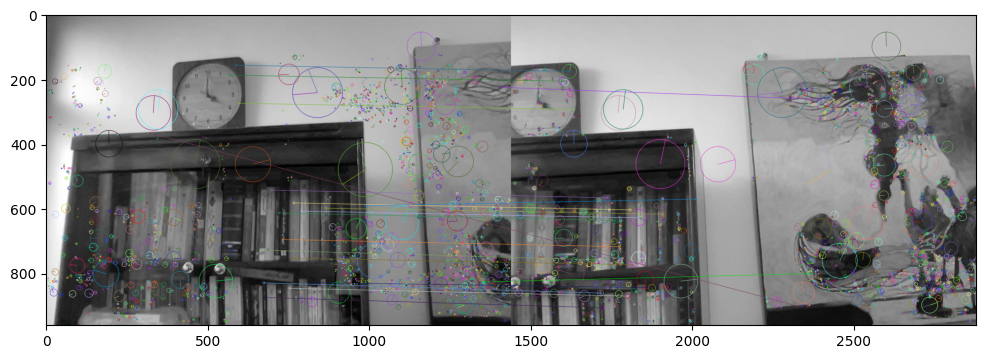

In [81]:
plt.figure(figsize=(12, 8))
plt.imshow(img4[:, :, ::-1])
plt.show()